# <center> <span style="font-family: Virgil GS, sans-serif; color:#97f788">Log Loss</span> </center>

<span style="font-family: Virgil GS, sans-serif; color:navyblue">Author: <a href="https://github.com/deburky" title="GitHub link">https://github.com/deburky</a></span>

<span style="font-family: Virgil GS, sans-serif; color: navyblue; font-size: 25px;">Binomial Likelihood</span>

-1.3546896366033478


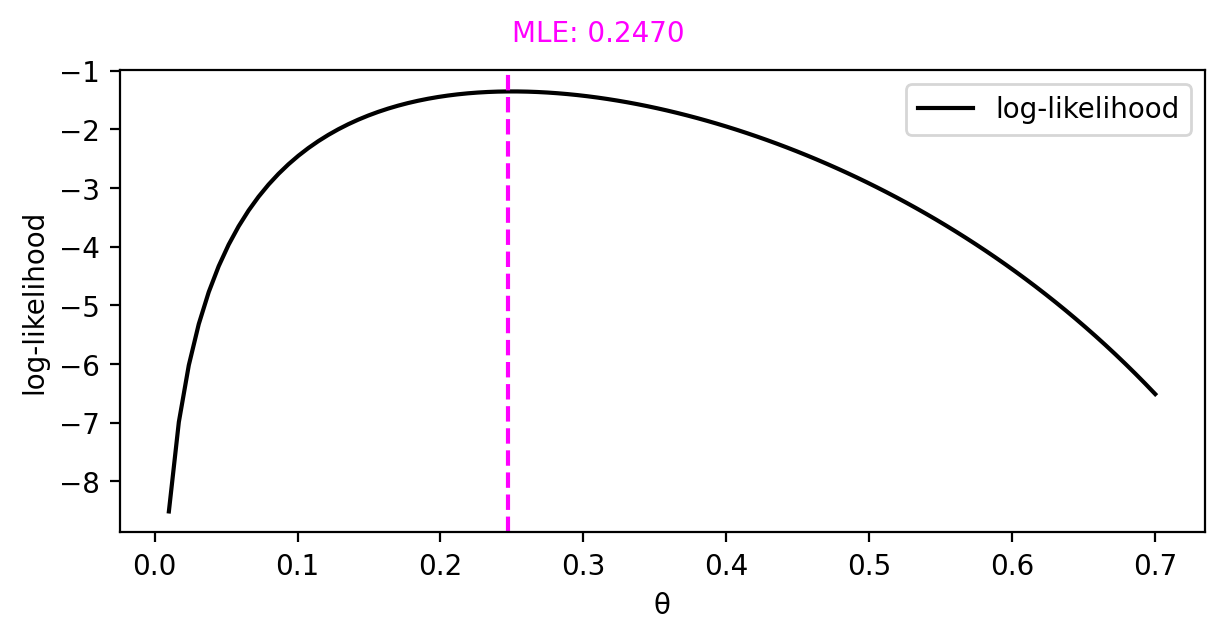

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from scipy.stats import binom

# Plot likelihood functions
theta_symbol = f'\u03B8'

theta_range = np.linspace(0.01, 0.7, 100)
likelihoods = {theta_symbol: [], 'log-likelihood': []}

for theta in theta_range:
    likelihood = binom.logpmf(3, 12, theta)
    likelihoods[theta_symbol].append(theta)
    likelihoods['log-likelihood'].append(likelihood)

ll = np.max(likelihoods['log-likelihood'])
mle_theta = likelihoods[theta_symbol][np.argmax(likelihoods['log-likelihood'])]

fig, ax = plt.subplots(figsize=(7, 3))
_ = pd.DataFrame(likelihoods).plot(x=theta_symbol, color='black', ax=ax)
plt.axvline(x=mle_theta, color='fuchsia', linestyle='--', linewidth=1.5)
plt.ylabel('log-likelihood')
plt.grid(alpha=0.0)
plt.text(0.25, -0.5, f'MLE: {mle_theta:.4f}', fontsize=10, color='fuchsia')
print(ll)

MLE: 0.7188


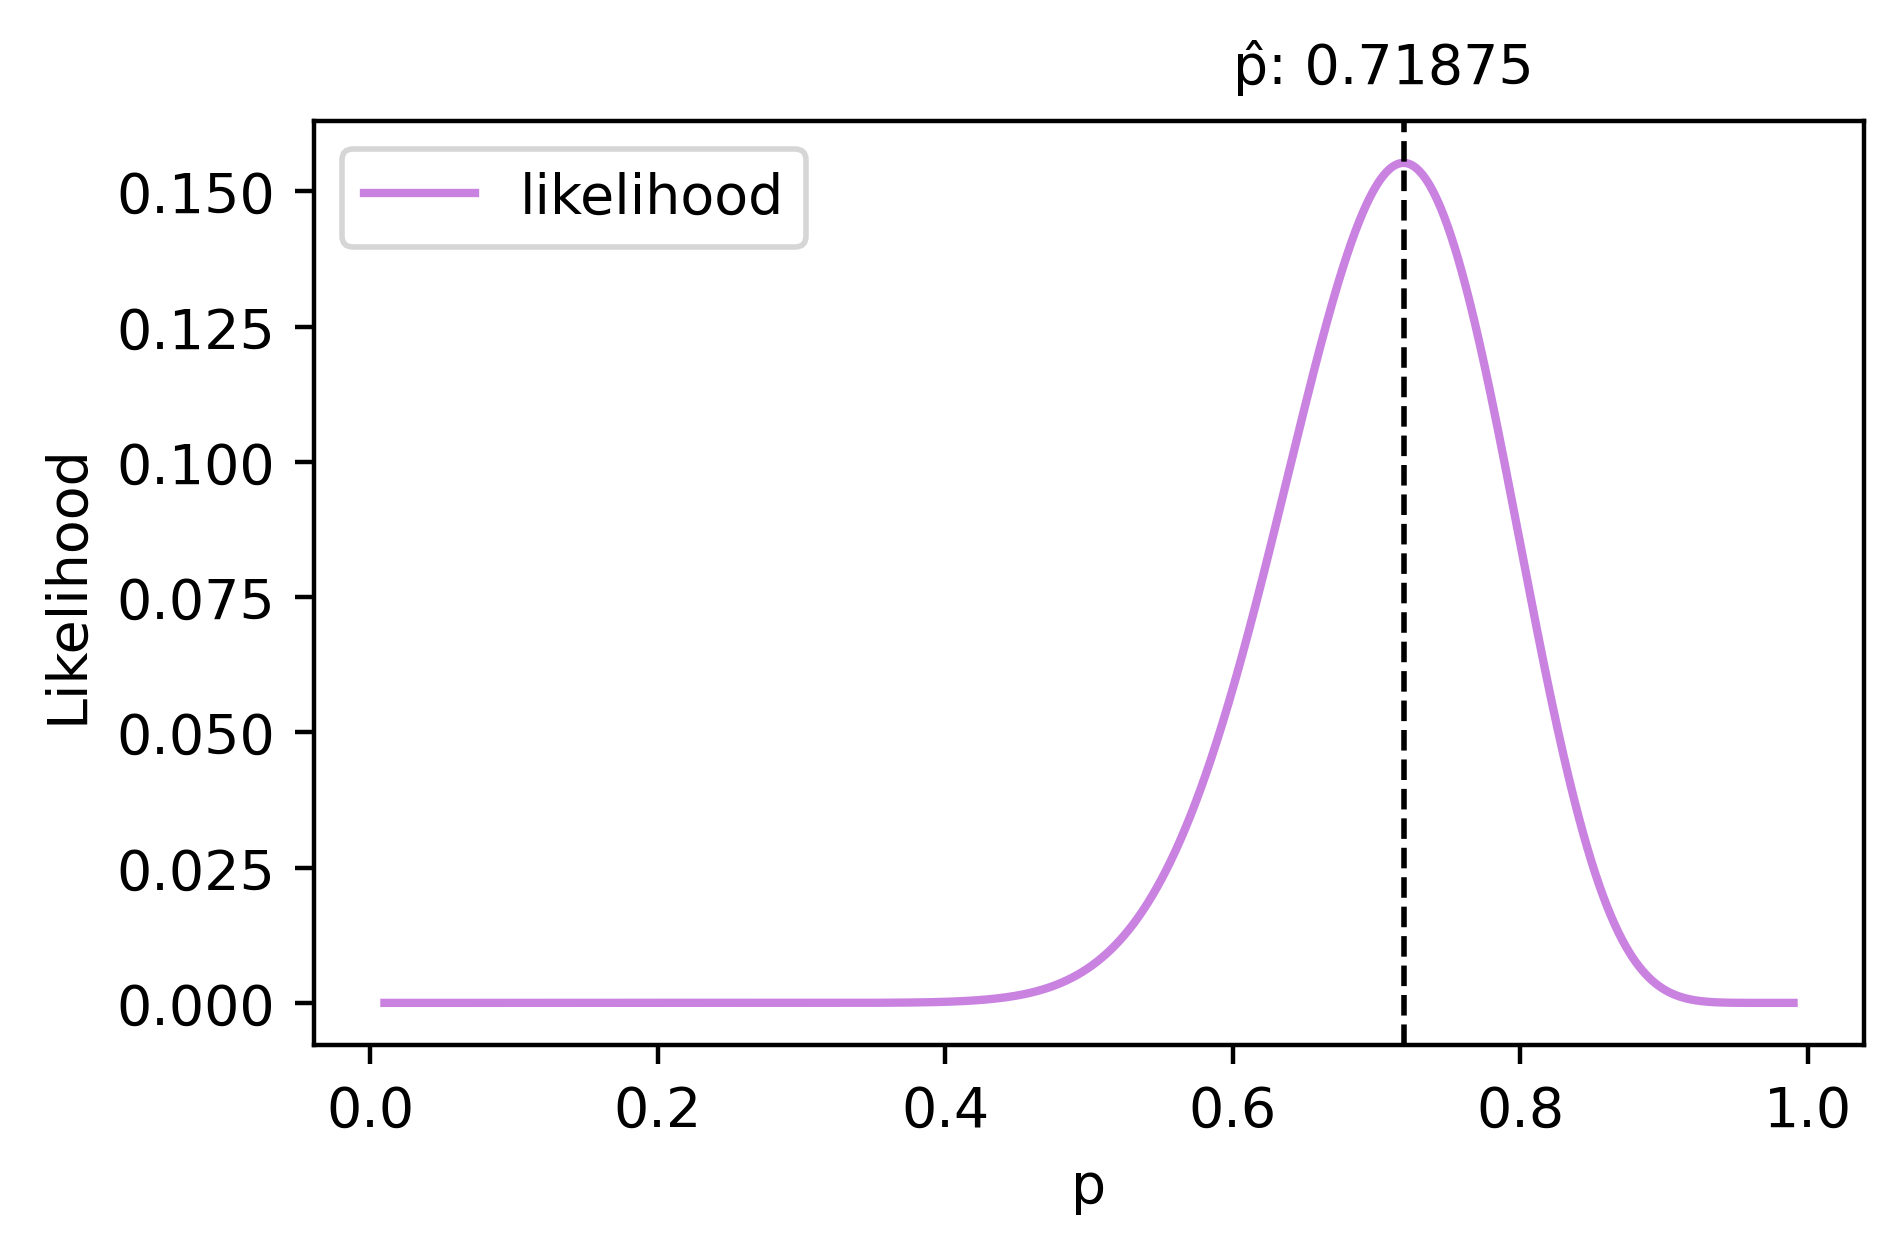

In [2]:
# Example from https://www.zoology.ubc.ca/biol548/lecturepdf/06.Likelihood.pdf
# L[parameter| data] = Pr[data | parameter]
# L[θ|X] = P[X|θ]

# Plot likelihood functions
theta_symbol = f'\u03B8'
p_hat_symbol = '$^{p}$'
theta_range = np.linspace(0.01, 0.99, 50_000)
likelihoods = {theta_symbol: [], 'likelihood': []}
colors = ["#7aa0c4", "#ca82e1", "#8bcd50", "#e18882"]

for theta in theta_range:
    likelihood = binom.pmf(23, 32, theta)
    likelihoods[theta_symbol].append(theta)
    likelihoods['likelihood'].append(likelihood)

mle_theta = likelihoods[theta_symbol][np.argmax(likelihoods['likelihood'])]
print(f"MLE: {mle_theta:.4f}")

fig, ax = plt.subplots(figsize=(5, 3), dpi=200)
_ = pd.DataFrame(likelihoods).plot(x=theta_symbol, color=colors[1], ax=ax)
plt.ylabel('Likelihood')
plt.xlabel('p')
plt.text(0.6, 0.17, f'p̂: {mle_theta:.5f}', fontsize=10, color='black')
plt.axvline(x=mle_theta, color='black', linestyle='--', linewidth=1.0)
plt.grid(alpha=0.0)
plt.show()

In [3]:
pd.DataFrame(likelihoods).query("likelihood == likelihood.max()").round(5)

,θ,likelihood
36160,0.71875,0.15525


$L(p) = \prod_{i=1}^{n}p^{\sum_{i=1}^{n}x_i}(1-p)^{n - \sum_{i=1}^{n}x_i}$

$LL(p) = \sum_{i=1}^{n}x_i \log(p) + (n - \sum_{i=1}^{n}x_i) \log(1-p)$

Text(0.66, -1.3, 'p̂: 0.71875')

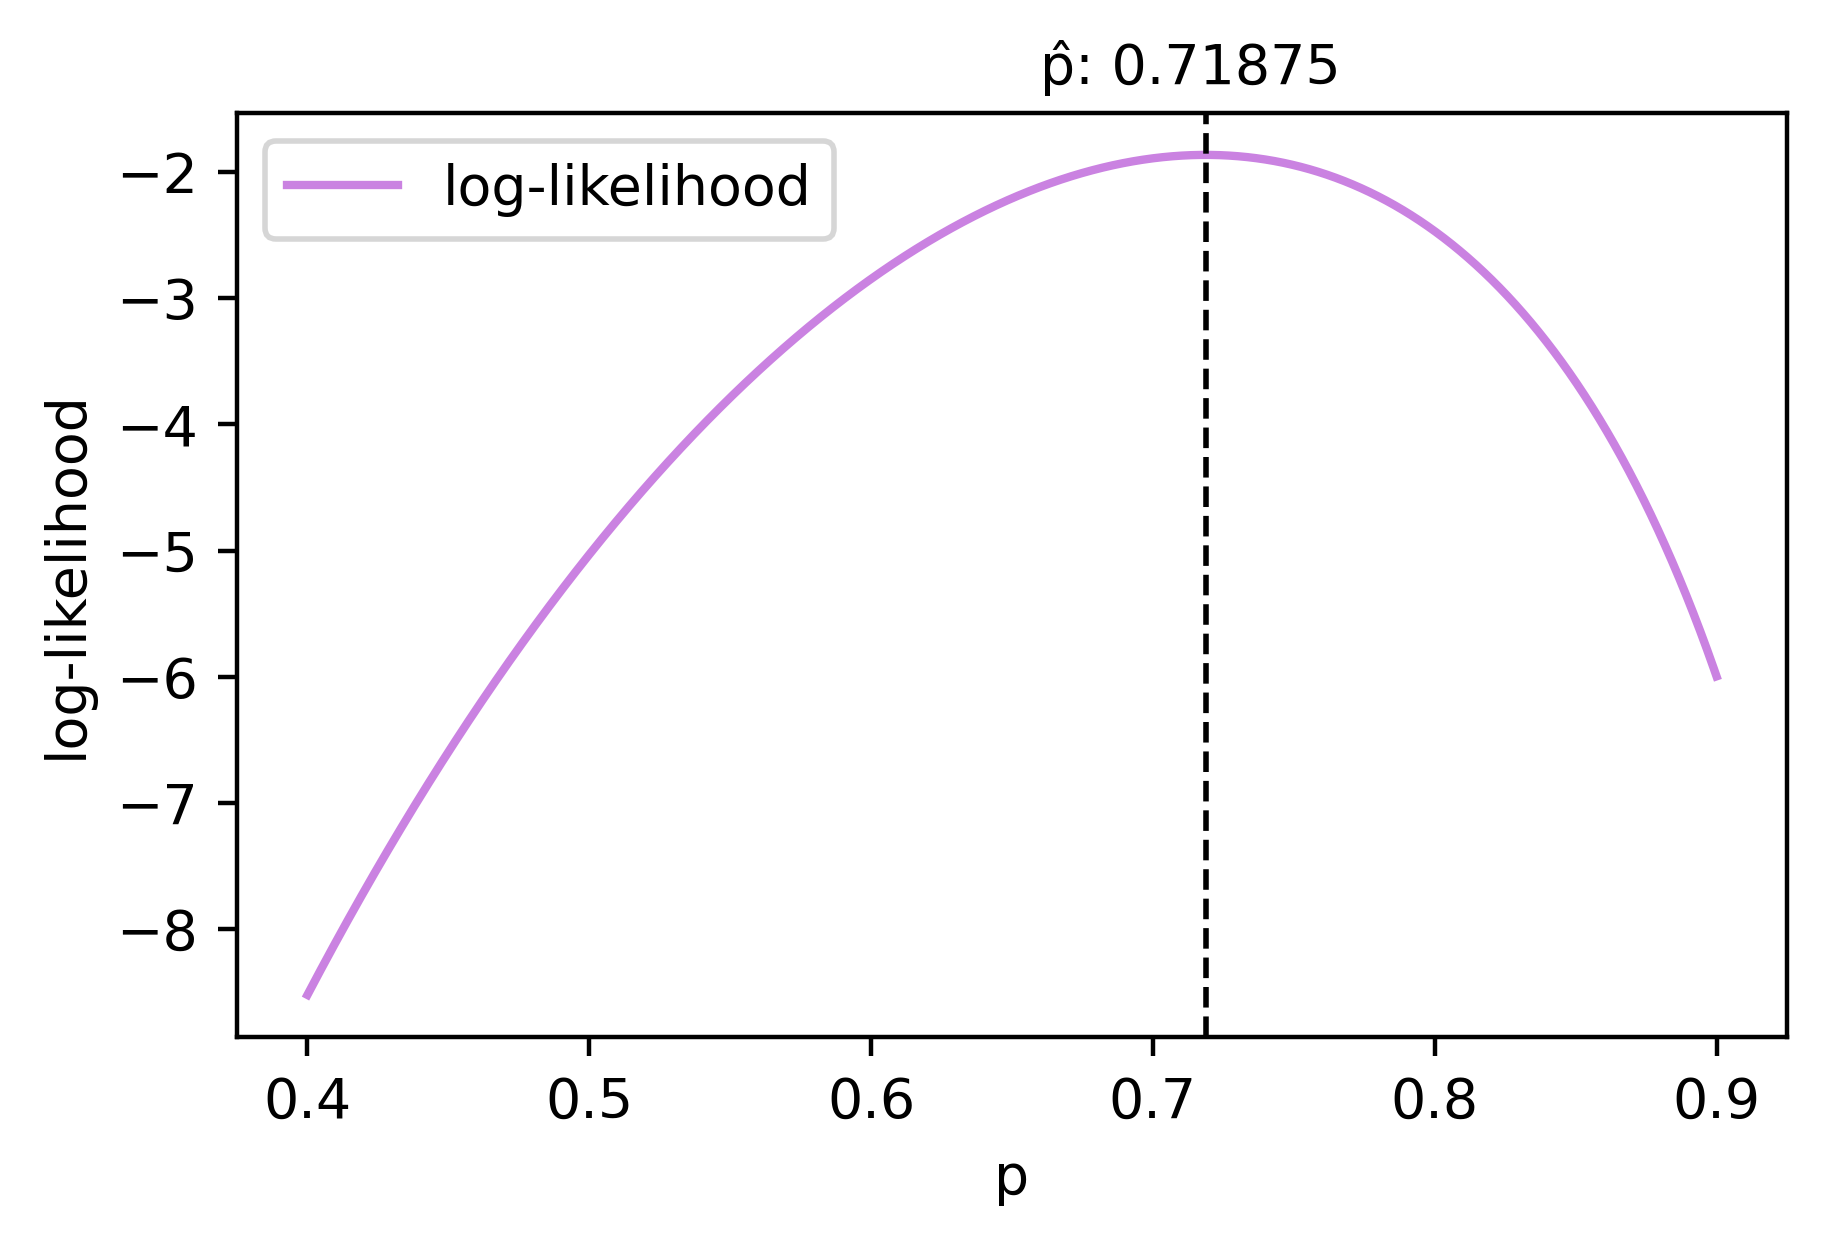

In [4]:
# Plot likelihood functions
theta_symbol = f'\u03B8'

theta_range = np.linspace(0.4, 0.9, 50_000)
likelihoods = {theta_symbol: [], 'log-likelihood': []}
colors = ["#7aa0c4", "#ca82e1", "#8bcd50", "#e18882"]

for theta in theta_range:
    likelihood = binom.logpmf(23, 32, theta)
    likelihoods[theta_symbol].append(theta)
    likelihoods['log-likelihood'].append(likelihood)

mle_theta = likelihoods[theta_symbol][np.argmax(likelihoods['log-likelihood'])]

fig, ax = plt.subplots(figsize=(5, 3), dpi=200)
# _ = pd.DataFrame(likelihoods).plot(x=theta_symbol, color='black', ax=ax)
_ = pd.DataFrame(likelihoods).plot(x=theta_symbol, color=colors[1], ax=ax)
plt.axvline(x=mle_theta, color='black', linestyle='--', linewidth=1.0)
plt.ylabel('log-likelihood')
plt.xlabel('p')
plt.grid(alpha=0.0)
plt.text(0.66, -1.3, f'p̂: {mle_theta:.5f}', fontsize=10, color='black')

<span style="font-family: Virgil GS, sans-serif; color: navyblue; font-size: 25px;">Bernoulli Likelihood</span>

Each data point is a Bernoulli trial. Each data point is support from data added to the total likelihood.

It's a support from independent evidence adds, log-likelihood is the weight of evidence.

The formula for Bernoulli likelihood is as follows:

$\prod_{i=1}^{n} p_{X(x_i)}^{Ber(\theta)} = \theta^{\sum_{i=1}^{n}x_i}(1-\theta)^{n - \sum_{i=1}^{n}x_i}$

The formula for Bernoulli log-likelihood is as follows:

$L(\theta) = \sum_{i=1}^{n}x_i \log(\theta) + (n - \sum_{i=1}^{n}x_i) \log(1-\theta)$

The formula for Binomial likelihood is as follows:

$L(\theta; x) = \binom{n}{x} \theta^x (1-\theta)^{n-x}$

The formula for Binomial log-likelihood is as follows:

$l(\theta) = \log\binom{n}{x} + x\log(\theta) + (n-x)\log(1-\theta)$

So knowing log-likelihood from Bernoulli trials, we can derive log-likelihood from Binomial trials.

$\text{Binomial log-likelihood} = \ln\binom{n}{k} - \text{Bernoulli log-likelihood}$

---
**References:**
- [Logistic Regression: Bernoulli vs. Binomial Response Variables](https://stats.stackexchange.com/questions/144121/logistic-regression-bernoulli-vs-binomial-response-variables)
- [Maximum Likelihood Estimation for Bernoulli distribution](https://stats.stackexchange.com/questions/275380/maximum-likelihood-estimation-for-bernoulli-distribution)
- [Generalized Linear Models](https://www.statsmodels.org/stable/examples/notebooks/generated/glm.html)
- [Scikit Binomial Deviance Loss Function](https://stats.stackexchange.com/questions/157870/scikit-binomial-deviance-loss-function)
- [From Bernoulli to Binomial Distributions](https://skeptric.com/bernoulli-binomial/index.html)
- [What is the Likelihood function and MLE of Binomial distribution?](https://stats.stackexchange.com/questions/505312/what-is-the-likelihood-function-and-mle-of-binomial-distribution)

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

data = pd.DataFrame(
    {
        'successes': [674, 26],
        'failures': [2136, 4164],
        'trials': [2810, 4190],
        'X': ['account_never_delinq_percent< 98', 'account_never_delinq_percent >= 98'],
    }
)

mod = smf.glm('successes + failures ~ X', family=sm.families.Binomial(), data=data).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Generalized Linear Model Regression Results                     
=====================================================================================
Dep. Variable:     ['successes', 'failures']   No. Observations:                    2
Model:                                   GLM   Df Residuals:                        0
Model Family:                       Binomial   Df Model:                            1
Link Function:                         Logit   Scale:                          1.0000
Method:                                 IRLS   Log-Likelihood:                -6.5866
Date:                       Tue, 27 Feb 2024   Deviance:                   1.1489e-12
Time:                               15:10:05   Pearson chi2:                 4.44e-27
No. Iterations:                            8   Pseudo R-squ. (CS):              1.000
Covariance Type:                   nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -5.0761      0.197    -25.803      0.000      -5.462      -4.691
X[T.account_never_delinq_percent< 98]     3.9227      0.202     19.455      0.000       3.527       4.318
=========================================================================================================
"""

In [6]:
# expanding the summary table into individual trial outcomes.
bernoulli_data = pd.DataFrame(columns=["Success", "X"])

# Loop through each row in the original DataFrame
for index, row in data.iterrows():
    # Add successes (Outcome = 1)
    success_rows = pd.DataFrame(
        {"Success": [1] * row["successes"], "X": [row["X"]] * row["successes"]}
    )

    # Add failures (Outcome = 0)
    failure_rows = pd.DataFrame(
        {"Success": [0] * row["failures"], "X": [row["X"]] * row["failures"]}
    )

    # Append these rows to the expanded DataFrame
    bernoulli_data = pd.concat(
        [bernoulli_data, success_rows, failure_rows], ignore_index=True
    )
    
bernoulli_data['Success'] = bernoulli_data['Success'].astype(int)

# display(bernouilli_data.head(5))

mod = smf.glm('Success ~ X', family=sm.families.Binomial(), data=bernoulli_data).fit()
mod.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Generalized linear model
======================================================================================
Model:                      GLM                     AIC:                   3416.2678  
Link Function:              Logit                   BIC:                   -58545.6829
Dependent Variable:         Success                 Log-Likelihood:        -1706.1    
Date:                       2024-02-27 15:10        LL-Null:               -2275.6    
No. Observations:           7000                    Deviance:              3412.3     
Df Model:                   1                       Pearson chi2:          7.00e+03   
Df Residuals:               6998                    Scale:                 1.0000     
Method:                     IRLS                                                      
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
Intercept                             -5.0761   0.1967 -25.8029 0.0000 -5.4617 -4.6906
X[T.account_never_delinq_percent< 98]  3.9227   0.2016  19.4551 0.0000  3.5275  4.3179
======================================================================================

"""

In [7]:
from sklearn.metrics import log_loss

mapping_p = bernoulli_data.groupby("X").mean()
bernoulli_data['p'] = bernoulli_data['X'].map(mapping_p['Success']).astype(float)
bernoulli_data['Success'] = bernoulli_data['Success'].astype(int)

log_loss_bernouilli = log_loss(bernoulli_data['Success'], bernoulli_data['p'])

print(f"Log Loss: {log_loss_bernouilli:.4f}")
print(f"Log-Likelihood: {-log_loss_bernouilli * 7000:.1f}")

Log Loss: 0.2437
Log-Likelihood: -1706.1


In [8]:
from sklearn.linear_model import LogisticRegression

X = pd.get_dummies(bernoulli_data['X'], drop_first=True)

logistic_model = LogisticRegression(solver='newton-cg', fit_intercept=True, penalty=None)
logistic_model.fit(X, bernoulli_data['Success'])

print(f"Intercept: {logistic_model.intercept_[0]:.4f}, Coefficient: {logistic_model.coef_.item():.4f}")

Intercept: -5.0761, Coefficient: 3.9227


<span style="font-family: Menlo, sans-serif; color: navyblue; font-size: 25px;">Bernoulli Likelihood</span>

The die example (3 successes from 12 trials with a number 5).

In [9]:
from scipy.stats import binom

theta_1 = binom.pmf(3, 12, 1/6)
theta_2 = binom.pmf(3, 12, 3/12)
theta_2_log = binom.logpmf(3, 12, 3/12)

likelihood_ratio = theta_2 / theta_1
print(f"{theta_1:.4%}, {theta_2:.4%}, {likelihood_ratio:.4f}")
print(f"Log-Likelihood: {theta_2_log:.4f}")
# -1.354394 with dbinom(3, 12, prob = 0.25, log=TRUE)

19.7396%, 25.8104%, 1.3075
Log-Likelihood: -1.3544


In [10]:
import math

# Check the log-likelihood of the binomial and Bernoulli distributions
binom_log_likelihood = np.log(math.comb(12, 3)) + 3 * np.log(3/12) + 9 * np.log(1 - (3/12))
bern_log_likelihood = 3 * np.log(3/12) + 9 * np.log(1 - (3/12))

print(f"Binomial Log-Likelihood: {binom_log_likelihood:.4f}")
print(f"Bernoulli Log-Likelihood: {bern_log_likelihood:.4f}")

Binomial Log-Likelihood: -1.3544
Bernoulli Log-Likelihood: -6.7480


Log-Likelihood: -1.3547


Text(0.25, -0.5, 'MLE: 0.2470')

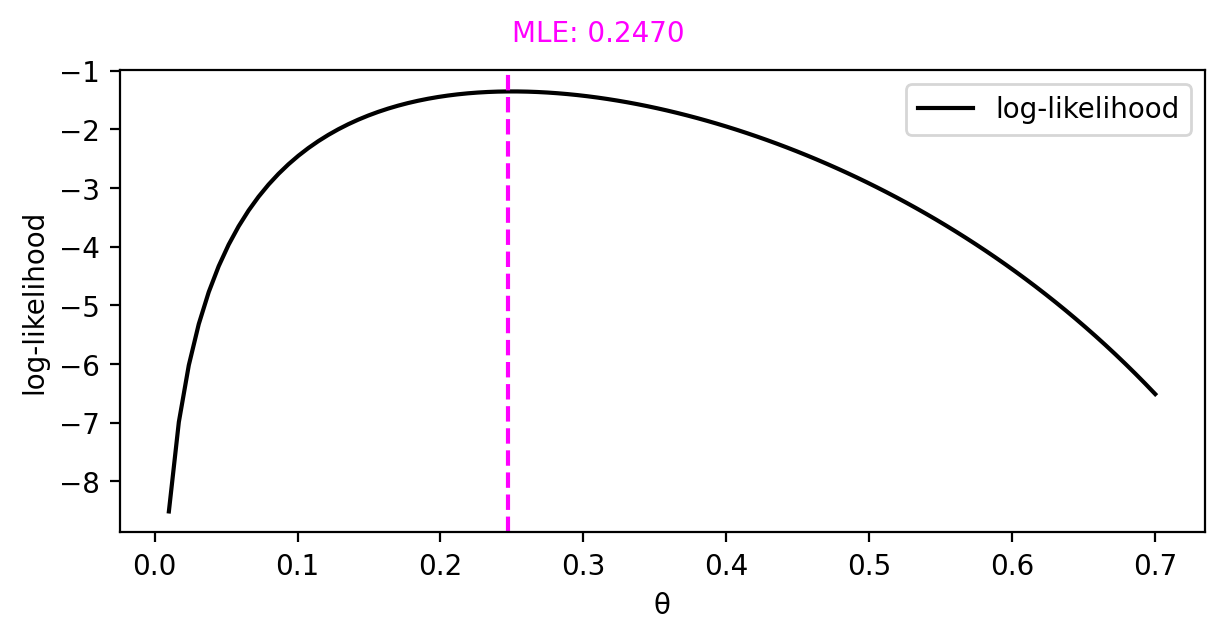

In [11]:
# Plot likelihood functions
theta_symbol = f'\u03B8'

theta_range = np.linspace(0.01, 0.7, 100)
likelihoods = {theta_symbol: [], 'log-likelihood': []}

for theta in theta_range:
    likelihood = binom.logpmf(3, 12, theta)
    likelihoods[theta_symbol].append(theta)
    likelihoods['log-likelihood'].append(likelihood)

mle_theta = likelihoods[theta_symbol][np.argmax(likelihoods['log-likelihood'])]
likelihood = likelihoods['log-likelihood'][np.argmax(likelihoods['log-likelihood'])]
print(f"Log-Likelihood: {likelihood:.4f}")

fig, ax = plt.subplots(figsize=(7, 3))
_ = pd.DataFrame(likelihoods).plot(x=theta_symbol, color='black', ax=ax)
plt.axvline(x=mle_theta, color='fuchsia', linestyle='--', linewidth=1.5)
plt.ylabel('log-likelihood')
plt.grid(alpha=0.0)
plt.text(0.25, -0.5, f'MLE: {mle_theta:.4f}', fontsize=10, color='fuchsia')

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = pd.DataFrame(
    {
        'successes': [3],
        'failures': [9],
        'trials': [12],
        'X': [3/12],
    }
)

data[['successes', 'failures', 'trials']] = data[['successes', 'failures', 'trials']].astype(int)

mod = smf.glm('successes + failures ~ X', family=sm.families.Binomial(), data=data).fit()
mod.summary2() # It suggests that X is inversely related to the likelihood of success.

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Generalized linear model
=========================================================================
Model:              GLM                       AIC:            4.7088     
Link Function:      Logit                     BIC:            -0.0000    
Dependent Variable: ['successes', 'failures'] Log-Likelihood: -1.3544    
Date:               2024-02-27 15:10          LL-Null:        -1.3544    
No. Observations:   1                         Deviance:       -4.2598e-29
Df Model:           0                         Pearson chi2:   4.44e-29   
Df Residuals:       0                         Scale:          1.0000     
Method:             IRLS                                                 
----------------------------------------------------------------------------
                Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
----------------------------------------------------------------------------
Intercept      -1.0340      0.6275    -1.6479    0.0994    -2.2638    0.1958
X              -0.2585      0.1569    -1.6479    0.0994    -0.5659    0.0489
=========================================================================

"""

Text(0.18, -1.35, 'p̂: 0.2499')

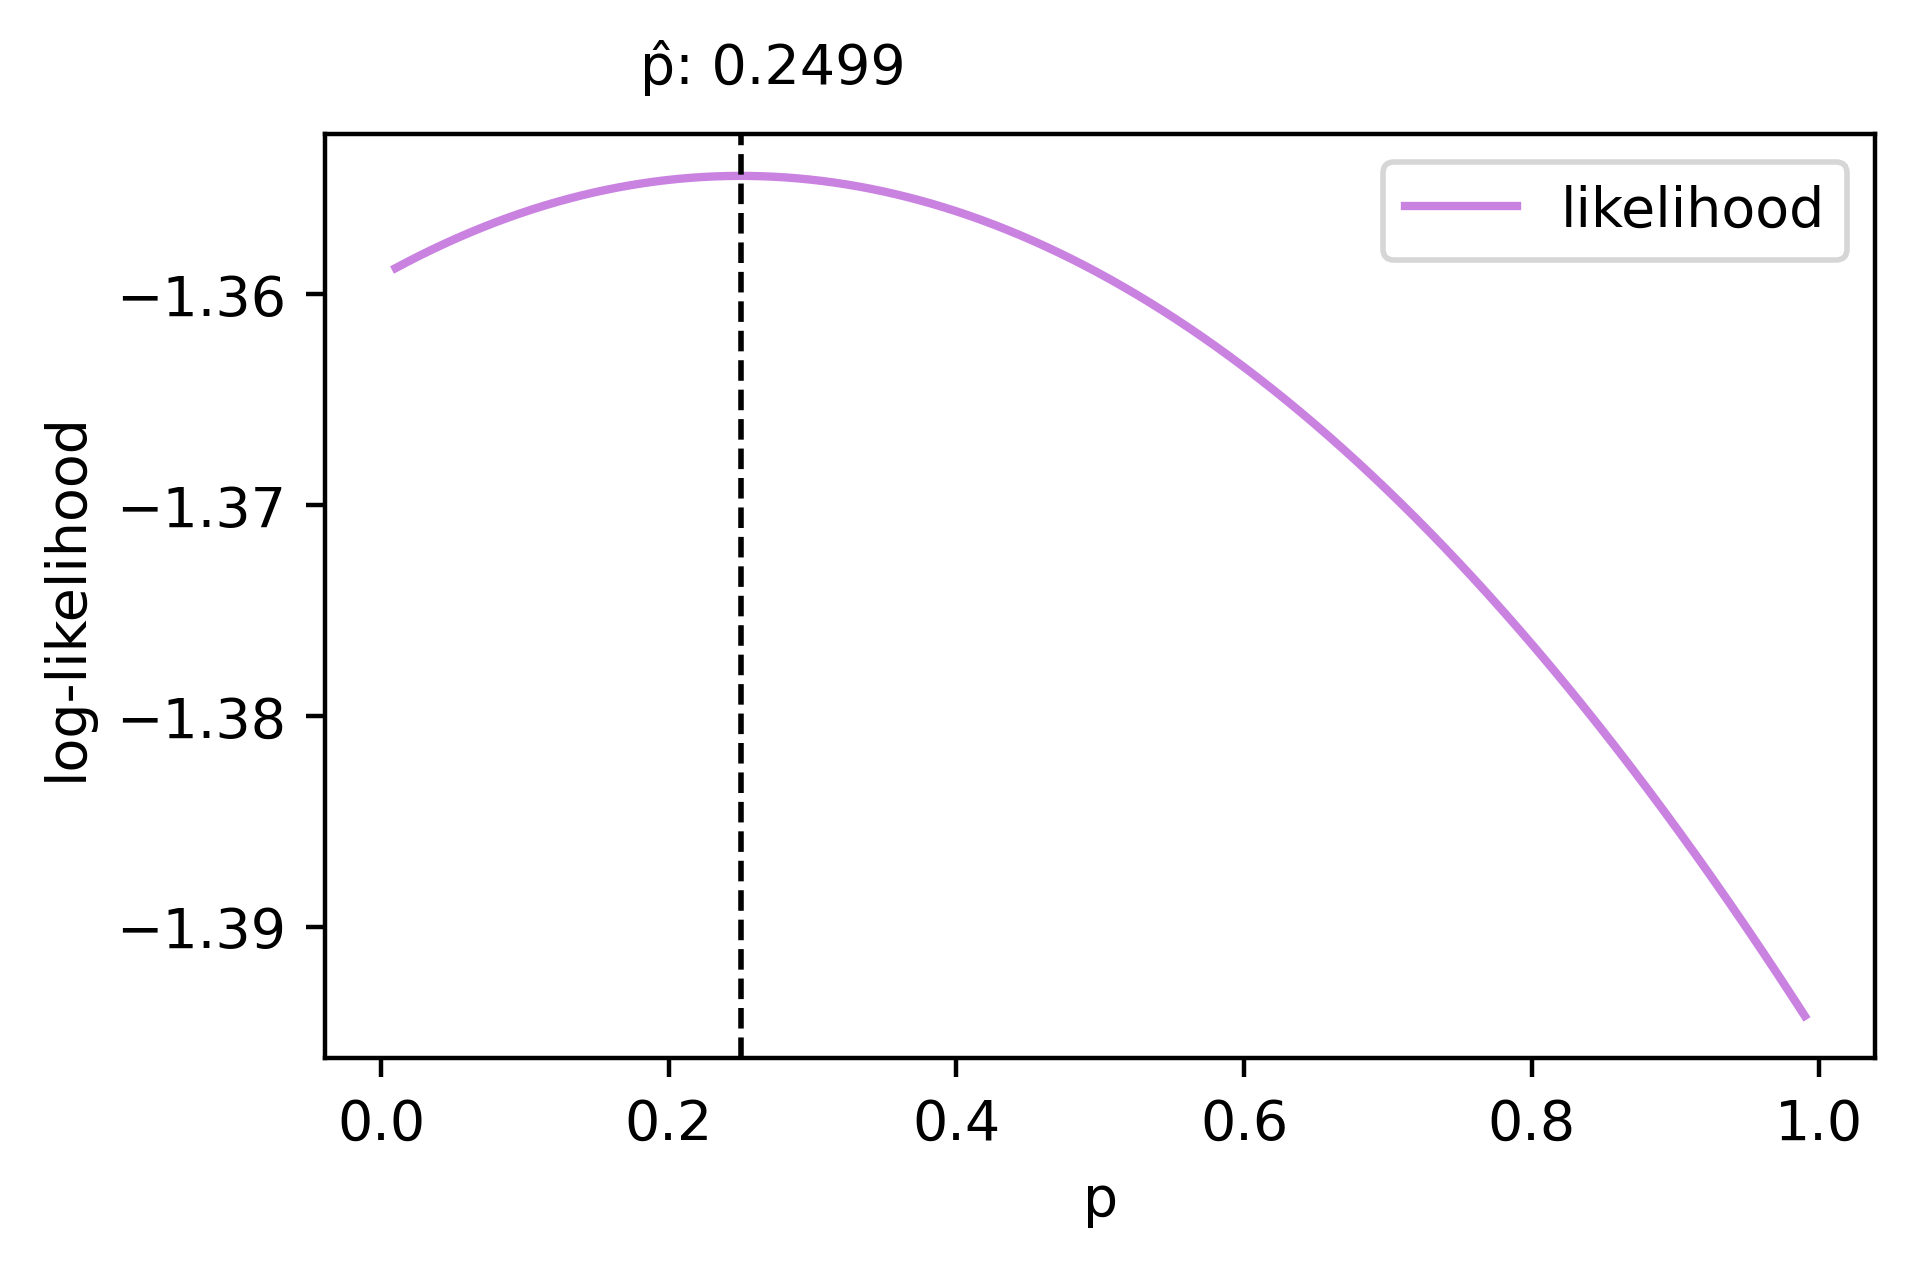

In [13]:
from scipy.special import expit as sigmoid
# Plot likelihood functions
theta_symbol = f'\u03B8'

m = -1.0340
b = -0.2585

theta_range = np.linspace(0.01, 0.99, 10_000)
likelihoods = {theta_symbol: [], 'likelihood': []}
colors = ["#7aa0c4", "#ca82e1", "#8bcd50", "#e18882"]

for theta in theta_range:
    estimate = b * theta + m
    log_comb = np.log(math.comb(12, 3))
    likelihood = log_comb + 3 * np.log(sigmoid(estimate)) + (12 - 3) * np.log(1-sigmoid(estimate))
    likelihoods[theta_symbol].append(theta)
    likelihoods['likelihood'].append(likelihood)

mle = np.argmax(likelihoods['likelihood'])
mle_theta = likelihoods[theta_symbol][np.argmax(likelihoods['likelihood'])]

fig, ax = plt.subplots(figsize=(5, 3), dpi=200)
_ = pd.DataFrame(likelihoods).plot(x=theta_symbol, label='log-likelihood', color=colors[1], ax=ax)
plt.ylabel('log-likelihood')
plt.xlabel('p')
plt.axvline(x=mle_theta, color='black', linestyle='--', linewidth=1.0)
plt.text(0.18, -1.35, f'p̂: {mle_theta:.4f}', fontsize=10, color='black')

In [14]:
# Expanding the summary table into individual trial outcomes.
bernoulli_data = pd.DataFrame(columns=["Success", "X"])

# Loop through each row in the original DataFrame
for index, row in data.iterrows():
    # Ensure successes and failures are treated as integers
    num_successes = int(row["successes"])
    num_failures = int(row["failures"])
    
    # Add successes (Outcome = 1)
    success_rows = pd.DataFrame({
        "Success": [1] * num_successes,
        "X": [row["X"]] * num_successes
    })

    # Add failures (Outcome = 0)
    failure_rows = pd.DataFrame({
        "Success": [0] * num_failures,
        "X": [row["X"]] * num_failures
    })

    # Append these rows to the expanded DataFrame
    bernoulli_data = pd.concat([bernoulli_data, success_rows, failure_rows], ignore_index=True)

bernoulli_data['Success'] = bernoulli_data['Success'].astype(int)

mod = smf.glm('Success ~ X', family=sm.families.Binomial(), data=bernoulli_data).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Success   No. Observations:                   12
Model:                            GLM   Df Residuals:                       11
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.7480
Date:                Tue, 27 Feb 2024   Deviance:                       13.496
Time:                        15:10:40   Pearson chi2:                     12.0
No. Iterations:                     4   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0340      0.627     -1.648      0.099      -2.264       0.196
X             -0.2585      0.157     -1.648      0.099      -0.566       0.049
==============================================================================
"""

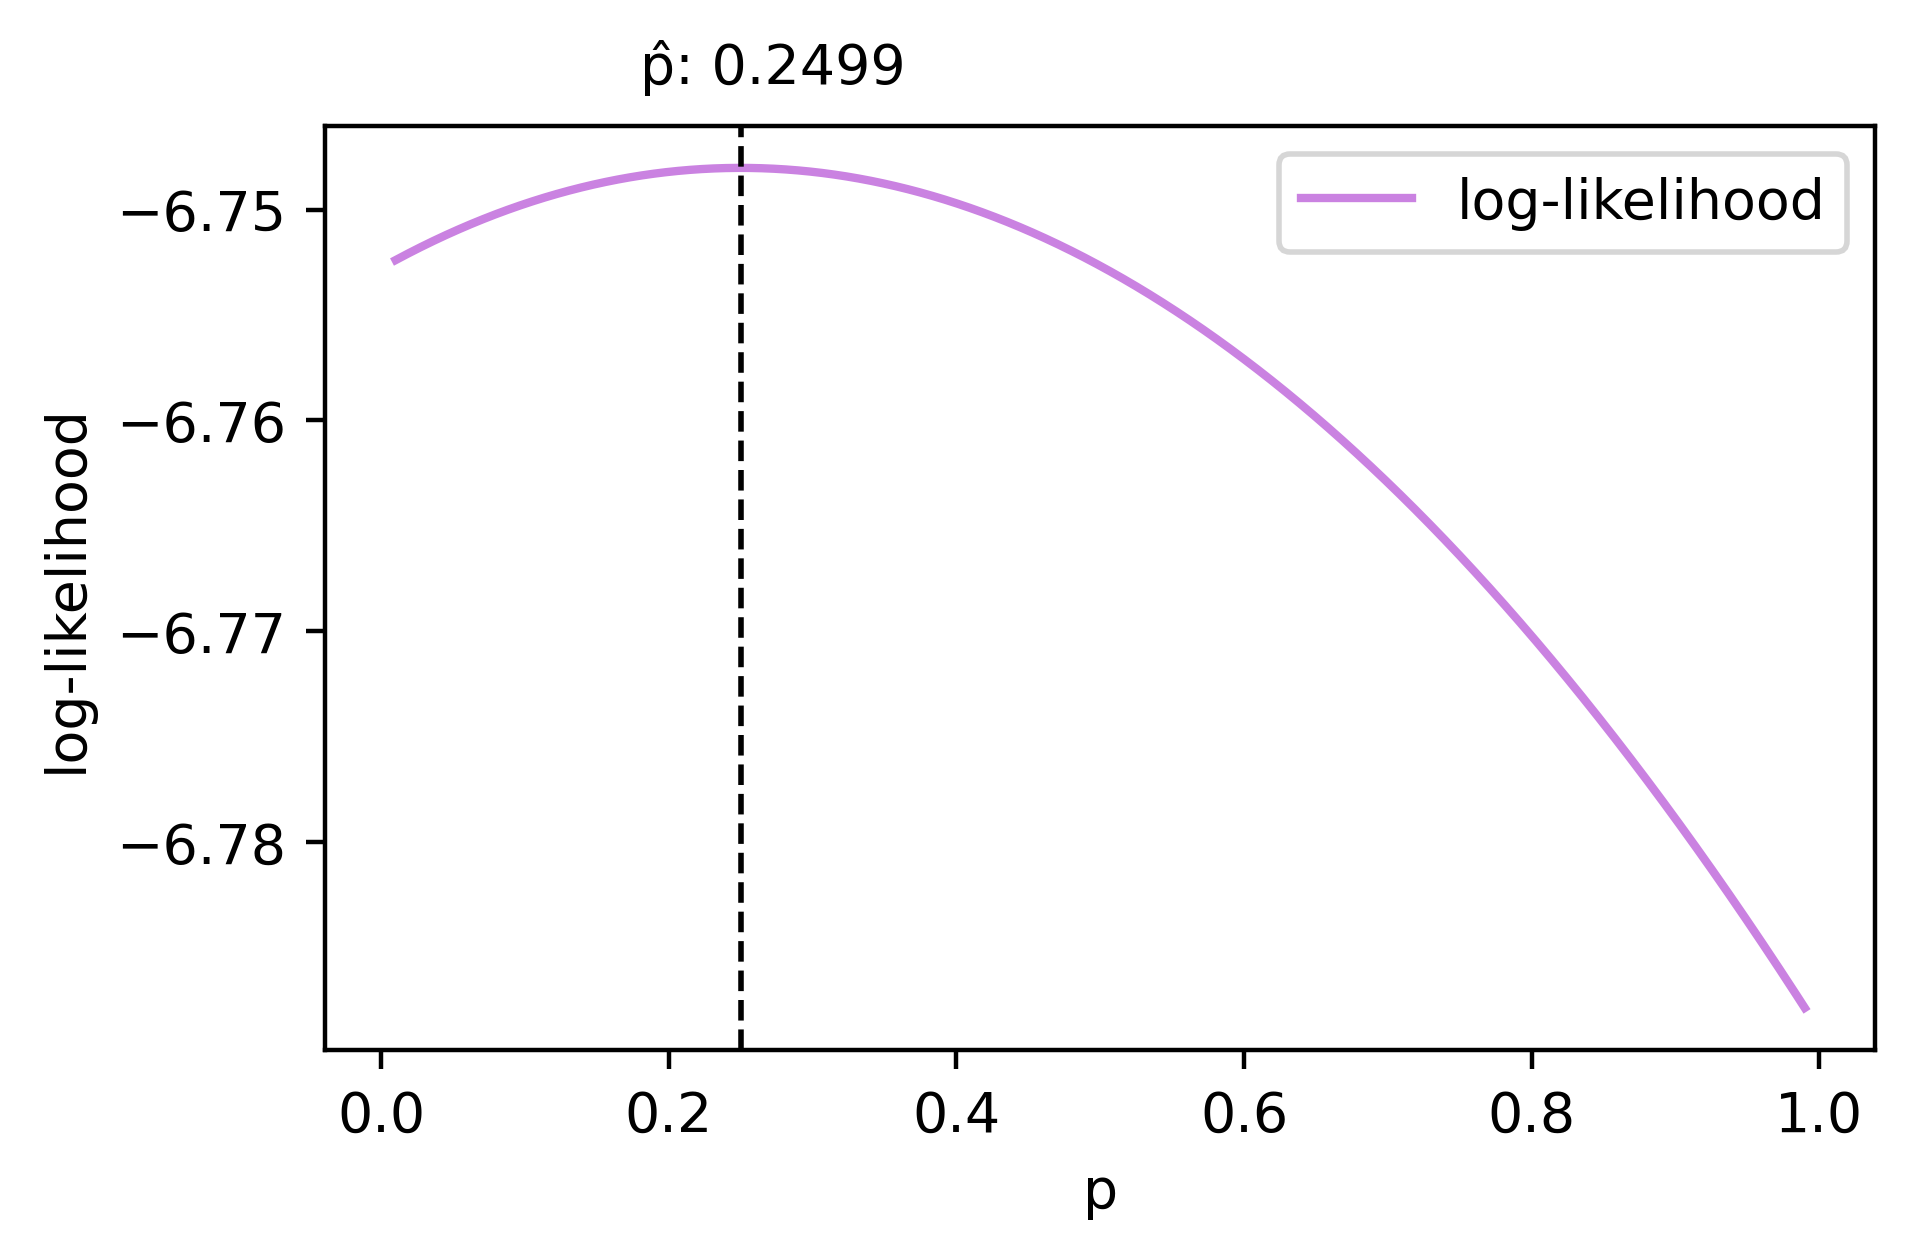

In [15]:
from scipy.special import expit as sigmoid
# Plot likelihood functions
theta_symbol = f'\u03B8'

m = -1.0340
b = -0.2585

theta_range = np.linspace(0.01, 0.99, 10_000)
likelihoods = {theta_symbol: [], 'log-likelihood': []}
colors = ["#7aa0c4", "#ca82e1", "#8bcd50", "#e18882"]

for theta in theta_range:
    estimate = b * theta + m
    likelihood = 3 * np.log(sigmoid(estimate)) + (12 - 3) * np.log(1-sigmoid(estimate))
    likelihoods[theta_symbol].append(theta)
    likelihoods['log-likelihood'].append(likelihood)

mle = np.argmax(likelihoods['log-likelihood'])
mle_theta = likelihoods[theta_symbol][np.argmax(likelihoods['log-likelihood'])]

fig, ax = plt.subplots(figsize=(5, 3), dpi=200)
_ = pd.DataFrame(likelihoods).plot(x=theta_symbol, label='log-likelihood', color=colors[1], ax=ax)
plt.legend()
plt.ylabel('log-likelihood')
plt.xlabel('p')
plt.axvline(x=mle_theta, color='black', linestyle='--', linewidth=1.0)
plt.text(0.18, -6.744, f'p̂: {mle_theta:.4f}', fontsize=10, color='black')
plt.show()

$\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]$

In [16]:
from sklearn.metrics import log_loss

mapping_p = bernoulli_data.groupby("X").mean()
bernoulli_data['p'] = bernoulli_data['X'].map(mapping_p['Success']).astype(float)
bernoulli_data['Success'] = bernoulli_data['Success'].astype(int)

log_loss_bernouilli = log_loss(bernoulli_data['Success'], bernoulli_data['p'])
log_likelihoood_bernoulli = -log_loss_bernouilli * len(bernoulli_data)
print(f"Log Loss: {log_loss_bernouilli:.4f}")
print(f"Log-Likelihood: {log_likelihoood_bernoulli:.4f}")

Log Loss: 0.5623
Log-Likelihood: -6.7480


In [17]:
# From Bernoulli to Binomial
log_comb = np.log(math.comb(12, 3))
binom_log_likelihood = log_comb - (log_loss_bernouilli * len(bernoulli_data))
print(f"Binomial Log-Likelihood: {binom_log_likelihood:.4f}")

Binomial Log-Likelihood: -1.3544


In [18]:
from sklearn.linear_model import LogisticRegression

X = bernoulli_data['X'].values.reshape(-1, 1)

logistic_model = LogisticRegression(solver='newton-cg', fit_intercept=True, penalty=None)
logistic_model.fit(X, bernoulli_data['Success'])

print(f"Intercept: {logistic_model.intercept_[0]:.4f}, Coefficient: {logistic_model.coef_.item():.4f}")

Intercept: -1.0340, Coefficient: -0.2585


<span style="font-family: Menlo, sans-serif; color: navyblue; font-size: 25px;">XGBoost example</span>

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Fetch blended credit data
url = (
    "https://drive.google.com/file/d/1Is8UZnPRExI-SLJMle8GRbFGpha5IvYZ/view?usp=sharing"
)
url = "https://drive.google.com/uc?id=" + url.split("/")[-2]
dataset = pd.read_csv(url, index_col=False)

features = [
    "external_risk_estimate",
    "revolving_utilization_of_unsecured_lines",
    "account_never_delinq_percent",
    "net_fraction_revolving_burden",
    "num_total_cc_accounts",
    "average_months_in_file",
]

X, y = dataset[features], dataset["is_bad"]

ix_train, ix_test = train_test_split(
    X.index, stratify=y, test_size=0.3, random_state=62
)

In [20]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_auc_score

best_params = dict(
    n_estimators=100,
    learning_rate=0.55,
    max_depth=1,
    min_child_weight=10,
    grow_policy="lossguide",
    early_stopping_rounds=5,
)

# Experimental: balanced sample weights
sample_weights = np.ones(len(y.loc[ix_train]))
mask = y.loc[ix_train] == 0
sample_weights[mask] = 1.0
sample_weights[~mask] = 1.0

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(**best_params, random_state=62)
evalset = [(X.loc[ix_train], y.loc[ix_train]), (X.loc[ix_test], y.loc[ix_test])]

# Fit the XGBoost model
xgb_model.fit(
    X.loc[ix_train],
    y.loc[ix_train],
    sample_weight=sample_weights,
    eval_set=evalset,
    verbose=False,
)

# Make predictions using the model
predictions_trn = xgb_model.predict_proba(X.loc[ix_train])[:, 1]
predictions_tst = xgb_model.predict_proba(X.loc[ix_test])[:, 1]

# Calculate the Gini score
gini_trn = roc_auc_score(y.loc[ix_train], predictions_trn) * 2 - 1  # type: ignore
gini_tst = roc_auc_score(y.loc[ix_test], predictions_tst) * 2 - 1  # type: ignore

print(f"Train Gini score: {gini_trn:.2%}\n" f"Test Gini score: {gini_tst:.2%}")

Train Gini score: 89.84%
Test Gini score: 89.11%


In [21]:
from xbooster.constructor import XGBScorecardConstructor

# Set up the scorecard constructor
scorecard_constructor = XGBScorecardConstructor(
    xgb_model, X.loc[ix_train], y.loc[ix_train]
)

# Construct the scorecard
xgb_scorecard = scorecard_constructor.construct_scorecard()

# Create a scorecard with points
xgb_scorecard_with_points = scorecard_constructor.create_points(
    pdo=50, target_points=600, target_odds=50
)

In [22]:
tree_1 = xgb_scorecard.query("Tree == 0")
tree_1

,Tree,Node,Feature,Sign,Split,Count,CountPct,NonEvents,Events,EventRate,WOE,IV,XAddEvidence,DetailedSplit
0,0,1,account_never_delinq_percent,<,98.0,2810.0,0.401429,2136.0,674.0,0.239858,1.043764,0.651110,0.282129,account_never_delinq_percent < 98
1,0,2,account_never_delinq_percent,>=,98.0,4190.0,0.598571,4164.0,26.0,0.006205,-2.878910,1.795892,-0.635539,account_never_delinq_percent >= 98 or missing


In [24]:
from sklearn.metrics import log_loss
from scipy.special import xlogy, logit, expit as sigmoid

condition = X.loc[ix_train]['account_never_delinq_percent']  < 98.0
metric = 'EventRate'
X_p = np.where(condition, tree_1.query("Node == 1")[metric].item(), tree_1.query("Node == 2")[metric].item())

X_p_ll = -(xlogy(y.loc[ix_train], X_p) + xlogy(1 - y.loc[ix_train], 1 - X_p))

log_loss_score = log_loss(y.loc[ix_train], X_p)
print(f"Log Loss: {log_loss_score:.4f}")

Log Loss: 0.2437


In [25]:
# Here we calculate cumulative log-likelihood
X_pred = pd.Series(xgb_model.predict_proba(X.loc[ix_train])[:, 1], name='p', index=ix_train)

df_with_label = pd.concat(
    [
        X_pred, 
        pd.Series(y.loc[ix_train], name='y', index=ix_train),
        pd.Series(X_p, name='p_1', index=ix_train)
    ], axis=1
)

df_with_label.sort_values('p', ascending=True, inplace=True)

df_with_label['LL'] = -(xlogy(df_with_label['y'], df_with_label['p']) + xlogy(1 - df_with_label['y'], 1 - df_with_label['p']))
df_with_label['CumLL'] = np.round(df_with_label['LL'].cumsum() / df_with_label['LL'].sum(), 6)

df_with_label['tree_1_ll'] = -(xlogy(df_with_label['y'], df_with_label['p_1']) + xlogy(1 - df_with_label['y'], 1 - df_with_label['p_1']))
df_with_label['tree_1_cumll'] = np.round(df_with_label['tree_1_ll'].cumsum() / df_with_label['tree_1_ll'].sum(), 6)

norm_const = np.mean(df_with_label['y'])

# Denominator from normalized cross-entropy
df_with_label['LL_base'] = -(xlogy(df_with_label['y'], norm_const) + xlogy(1 - df_with_label['y'], 1 - norm_const))
# df_with_label['CumLL'] = df_with_label['LL'].cumsum() / (df_with_label.index + 1)

In [26]:
df_with_label['base_cumll'] = np.round(df_with_label['LL_base'].cumsum() / df_with_label['LL_base'].sum(), 6)

In [28]:
df_with_label['LL'].sum(), df_with_label['tree_1_ll'].sum(), df_with_label['LL_base'].sum()

(1104.071755574548, 1706.1338807294312, 2275.5808137401373)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_with_label is your DataFrame
df_sorted = df_with_label.sort_values('p', ascending=True)

# Calculate cumulative log-likelihoods directly
df_sorted['cumsum_LL'] = df_sorted['LL'].cumsum()
df_sorted['cumsum_tree_1_ll'] = df_sorted['tree_1_ll'].cumsum()
df_sorted['cumsum_LL_base'] = df_sorted['LL_base'].cumsum()

ll_xgboost = df_sorted['LL'].sum()
ll_xgboost_one = df_sorted['tree_1_ll'].sum()
ll_base = df_sorted['LL_base'].sum()

plt.figure(figsize=(10, 5), dpi=600)
colors = plt.cm.cool(np.linspace(0, 1, 20))

# Plotting each cumulative LL as a bar plot
width = 1.0 # Width of the bars
indices = np.arange(len(df_sorted))

plt.bar(indices - width, df_sorted['cumsum_LL'], width=width, alpha=1.0, color=colors[4], label=f'XGBoost model LL: {-ll_xgboost:.4f}')
plt.bar(indices, df_sorted['cumsum_tree_1_ll'], width=width, alpha=0.5, color=colors[10], label=f'One XGBoost iteration LL: {-ll_xgboost_one:.4f}')
plt.bar(indices + width, df_sorted['cumsum_LL_base'], width=width, alpha=0.3, color=colors[12], label=f'Baseline (constant) LL: {-ll_base:.4f}')

# Customization to remove top and right axes and axis ticks
ax = plt.gca()  # Get the current Axes instance on the current figure matching the given keyword args, or create one.

ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.tick_params(axis='x', length=0)  # Remove x-axis tick marks
ax.tick_params(axis='y', length=0)  # Remove y-axis tick marks

# Adding legends, title, and labels
plt.legend()
plt.title('Cumulative Negative Log Likelihood')
plt.xlabel('Samples (sorted by p ascending)')
plt.ylabel('Cumulative Negative Log Likelihood')

plt.tight_layout()
plt.show()

<Axes: >

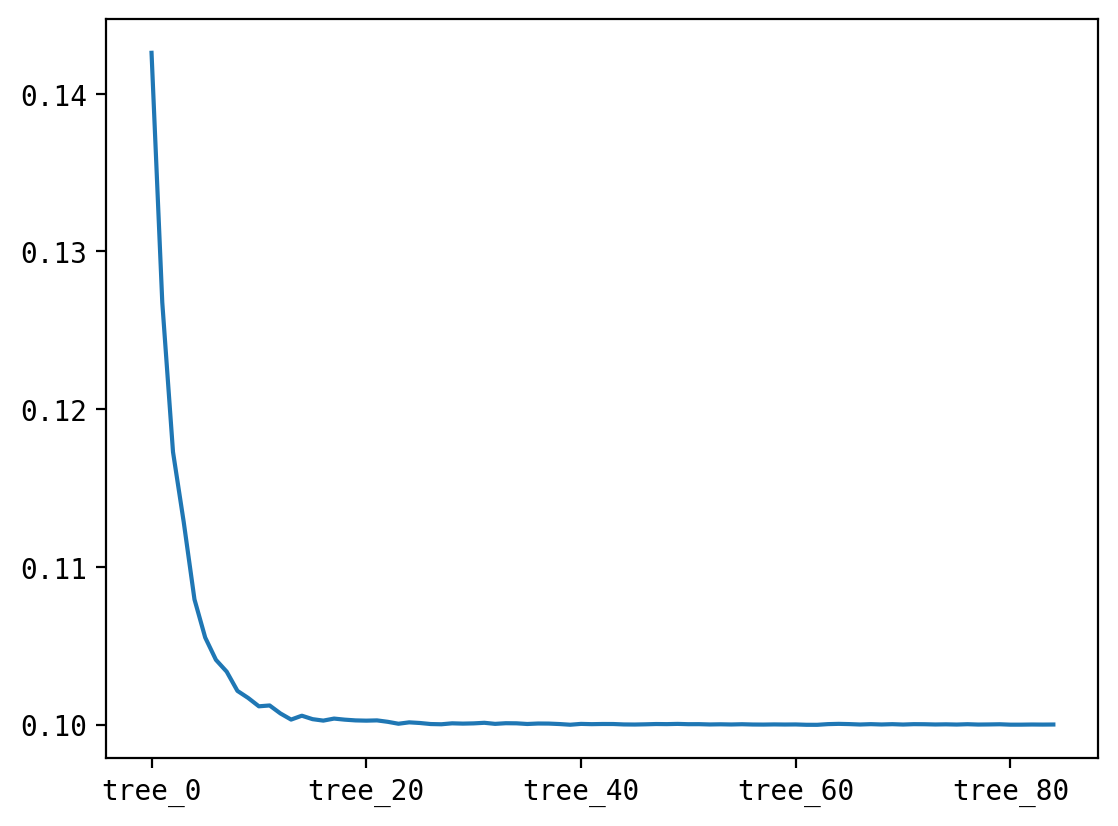

In [36]:
dataframe_with_trees = scorecard_constructor.get_leafs(X.loc[ix_train])

dataframe_with_trees['base_score'] = logit(scorecard_constructor.base_score)

# Ensure that 'base_score' is the first column if it's not already
cols = ['base_score'] + [col for col in dataframe_with_trees.columns if 'tree_' in col]
dataframe_with_trees = dataframe_with_trees[cols]

# Calculate the cumulative sum across the tree columns, starting from 'base_score'
for col in dataframe_with_trees.columns[1:]:  # Skip 'base_score' as it's the starting point
    dataframe_with_trees[col] = dataframe_with_trees[col] + dataframe_with_trees.iloc[:, dataframe_with_trees.columns.get_loc(col) - 1]
dataframe_with_trees.drop(columns='base_score', inplace=True)

dataframe_with_trees = sigmoid(dataframe_with_trees)

dataframe_with_trees.index = ix_train
dataframe_with_trees.mean().plot()

In [48]:
plt.rcParams['font.family'] = 'monospace'
fig, ax = plt.subplots(figsize=(10, 5), dpi=600)

n_trees = 30
# for i, tree in enumerate(dataframe_with_trees.columns):
for i, tree in enumerate(dataframe_with_trees.columns[:n_trees]):
    
    df = pd.concat([y.loc[ix_train], dataframe_with_trees[tree]], axis=1)
    
    df['LL'] = -(xlogy(df['is_bad'], df[tree]) + xlogy(1 - df['is_bad'], 1 - df[tree]))
        
    df.sort_values(tree, ascending=True, inplace=True)
    
    df['cumsum_LL'] = df['LL'].cumsum()

    # colors = plt.cm.bone(np.linspace(0, 1, n_trees))
    colors = plt.cm.get_cmap('cool')
    colors = colors.reversed()(np.linspace(0.5, 0.7, n_trees))

    # Plotting each cumulative LL as a bar plot
    width = 1.0
    indices = np.arange(len(df))
    
    ax.bar(indices, df['cumsum_LL'], width=width, alpha=0.7, color=colors[i], label=f'tree {i+1}')
    # ax.bar(indices, df['cumsum_LL'], width=width, alpha=0.7, color=colors[i], label=f'tree {i+1}')

ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.tick_params(axis='x', length=0)  # Remove x-axis tick marks
ax.tick_params(axis='y', length=0)  # Remove y-axis tick marks

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 7})
plt.title('Cumulative Negative Log Likelihood')
plt.xlabel('Samples (sorted by p ascending)')
plt.ylabel('Cumulative Negative Log Likelihood')

plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

Text(0, 0.5, 'Log Loss')

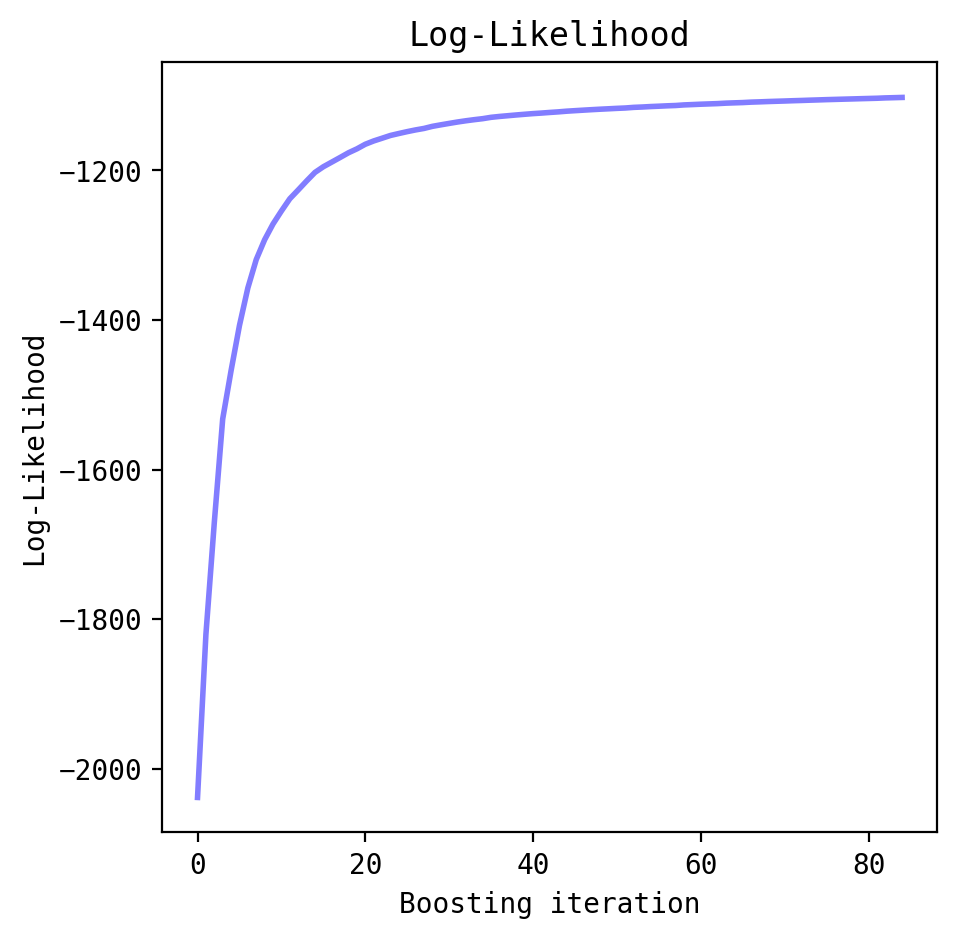

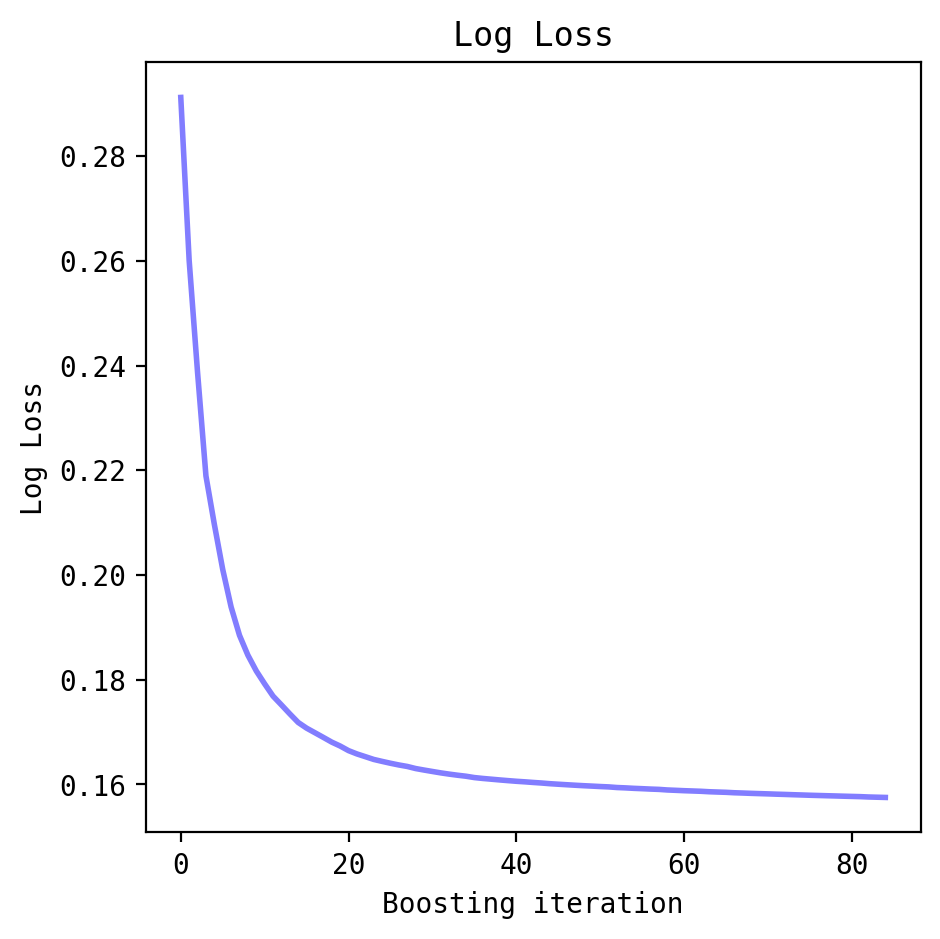

In [45]:
losses = []

for col in dataframe_with_trees.columns:
    log_loss_score = log_loss(y.loc[ix_train], dataframe_with_trees[col])
    ll_column = -(xlogy(y.loc[ix_train], dataframe_with_trees[col]) + xlogy(1 - y.loc[ix_train], 1 - dataframe_with_trees[col]))
    losses.append(log_loss_score * -len(y.loc[ix_train]))
    
loss_data = pd.Series(losses)

colors = plt.cm.get_cmap('cool')(np.linspace(0.5, 0.7, dataframe_with_trees.shape[1]))
# Set font family to Monospace
plt.rcParams['font.family'] = 'monospace'
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
loss_data.plot(color=colors[4], linestyle='-', linewidth=2.0, ax=ax)
plt.title('Log-Likelihood')
plt.xlabel('Boosting iteration')
plt.ylabel('Log-Likelihood')


log_loss_data = loss_data / -len(y.loc[ix_train])

colors = plt.cm.get_cmap('cool')(np.linspace(0.5, 0.7, dataframe_with_trees.shape[1]))
# Set font family to Monospace
plt.rcParams['font.family'] = 'monospace'
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
log_loss_data.plot(color=colors[4], linestyle='-', linewidth=2.0, ax=ax)
plt.title('Log Loss')
plt.xlabel('Boosting iteration')
plt.ylabel('Log Loss')